In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path ='/content/drive/My Drive/Colab/Abeer/Datasets/'
dataset=4 # 1-4:  whuGait,   5:  OU-ISIR

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import os
files=['_acc_x.txt','_acc_y.txt','_acc_z.txt','_gyr_x.txt','_gyr_y.txt','_gyr_z.txt']

In [ ]:
def load_X(path,datatype):
    X_signals = []
    for my_file in files:
        my_file=datatype+my_file
        fileName = os.path.join(path,my_file)
        file = open(fileName, 'r')
        ss=[np.array(cell, dtype=np.float32) for cell in [
                row.strip().split(' ') for row in file
            ]]
        X_signals.append(
            ss
        )
        file.close()
        #X_signals = 6*totalStepNum*128
    return np.transpose(np.array(X_signals), (1, 2, 0))#(totalStepNum*128*6)
def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    y_ = y_ - 1
    #one_hot
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS



In [ ]:
# features
dataset=1
X_train = load_X(data_path+str(dataset)+'/train/Inertial Signals/','train')
X_test = load_X(data_path+str(dataset)+'/test/Inertial Signals/','test')
train_label = load_y(data_path+str(dataset)+'/train/y_train.txt')
test_label = load_y(data_path+str(dataset)+'/test/y_test.txt')
print(type(X_train))
print(type(train_label))
print(train_label.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(33104, 118)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 126, 64)           1216      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 63, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 61, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 30, 128)          0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_5 (LSTM)               (None, 64)               

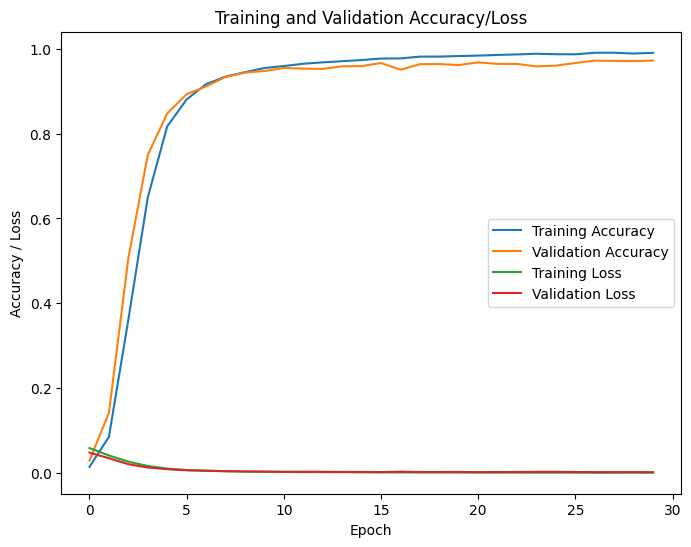

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

# Assuming X_train, train_label, X_test, and test_label are already loaded and preprocessed

# Define the CNN + LSTM model
def create_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM layer
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64, return_sequences=False))
    # Dense layer
    model.add(Dense(128, activation='relu'))
    # Output layer
    model.add(Dense(num_classes, activation='sigmoid'))
    return model

# Set the input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = train_label.shape[1]
# Create the model
model = create_model(input_shape, num_classes)
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print the model summary
model.summary()

# Train the model
epochs = 30
batch_size = 32
X_train1, X_val, train_label1, val_label = train_test_split(Xfull, train_full, test_size=0.2, random_state=42)
history = model.fit(X_train1, train_label1, epochs=epochs, batch_size=batch_size, validation_data=(X_val, val_label))


# Plot the accuracy and loss curves during training
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()


In [ ]:
model.evaluate(x=X_test, y=test_label)


In [ ]:
import pickle
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds'+str(dataset)+'.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

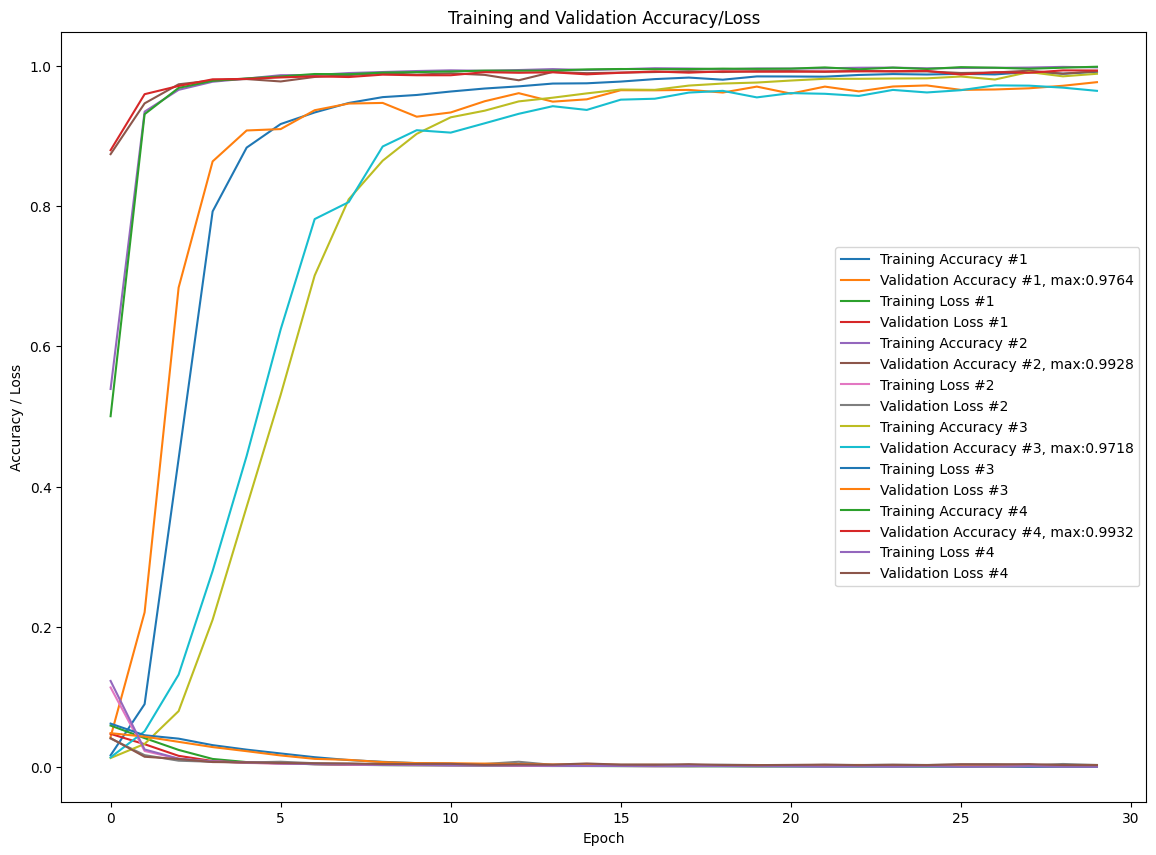

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds1.pkl', 'rb') as file:
    loaded_history1 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds2.pkl', 'rb') as file:
    loaded_history2 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds3.pkl', 'rb') as file:
    loaded_history3 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds4.pkl', 'rb') as file:
    loaded_history4 = pickle.load(file)

plt.figure(figsize=(14, 10))
# You can access the metrics like accuracy and loss from the loaded_history dictionary
training_accuracy = loaded_history1['accuracy']
validation_accuracy = loaded_history1['val_accuracy']
training_loss = loaded_history1['loss']
validation_loss = loaded_history1['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #1')
plt.plot(validation_accuracy, label=('Validation Accuracy #1, max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #1')
plt.plot(validation_loss, label='Validation Loss #1')

training_accuracy = loaded_history2['accuracy']
validation_accuracy = loaded_history2['val_accuracy']
training_loss = loaded_history2['loss']
validation_loss = loaded_history2['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #2')
plt.plot(validation_accuracy, label=('Validation Accuracy #2, max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #2')
plt.plot(validation_loss, label='Validation Loss #2')

training_accuracy = loaded_history3['accuracy']
validation_accuracy = loaded_history3['val_accuracy']
training_loss = loaded_history3['loss']
validation_loss = loaded_history3['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #3')
plt.plot(validation_accuracy, label=('Validation Accuracy #3, max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #3')
plt.plot(validation_loss, label='Validation Loss #3')

training_accuracy = loaded_history4['accuracy']
validation_accuracy = loaded_history4['val_accuracy']
training_loss = loaded_history4['loss']
validation_loss = loaded_history4['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #4')
plt.plot(validation_accuracy, label=('Validation Accuracy #4, max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #4')
plt.plot(validation_loss, label='Validation Loss #4')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(35373, 128, 6)
(35373, 20)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 126, 64)           1216      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 63, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 61, 128)           24704     
                                                                 
 batch_normalization_3 (Batc  (None, 61, 128)          244       
 hNormalization)                                                 
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 30, 128)          0         
 1D)                                        

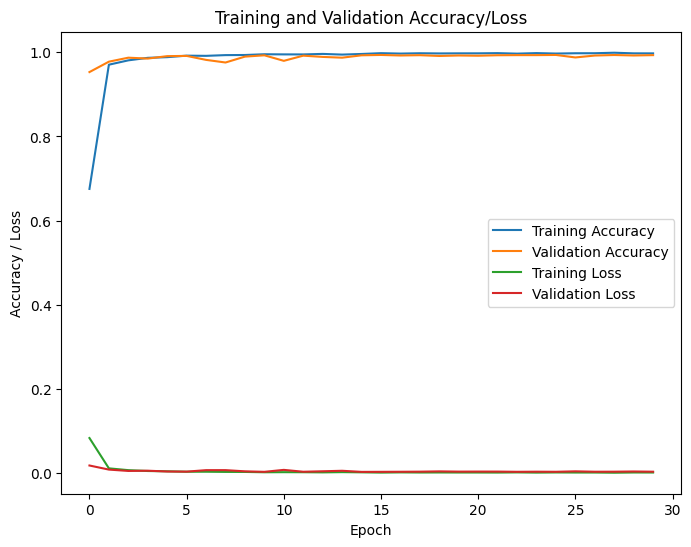

In [ ]:
# features
dataset=4
X_train = load_X(data_path+str(dataset)+'/train/Inertial Signals/')
X_test = load_X(data_path+str(dataset)+'/test/Inertial Signals/')
train_label = load_y(data_path+str(dataset)+'/train/y_train.txt')
test_label = load_y(data_path+str(dataset)+'/test/y_test.txt')
print(type(X_train))
print(type(train_label))
print(X_train.shape)
print(train_label.shape)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Flatten, LSTM, BatchNormalization
from sklearn.model_selection import train_test_split

# Assuming X_train, train_label, X_test, and test_label are already loaded and preprocessed

# Define the CNN + LSTM model
def create_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization(axis=1,synchronized=True))
    model.add(MaxPooling1D(pool_size=2))

    # GRU layer
    model.add(LSTM(256, return_sequences=True))
    model.add(LSTM(128, return_sequences=False))

    # Dense layer
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='sigmoid'))

    return model

# Set the input shape and number of classes
input_shape = (128, 6)
num_classes = train_label.shape[1]

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
epochs = 30
batch_size = 32
X_train, X_val, train_label, val_label = train_test_split(X_train, train_label, test_size=0.2, random_state=42)
history = model.fit(X_train, train_label, epochs=epochs, batch_size=batch_size, validation_data=(X_val, val_label))


# Plot the accuracy and loss curves during training
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
import pickle
with open(data_path+'CNN+LSTM_32_relu_sigmoid_128_batch_ds'+str(dataset)+'.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

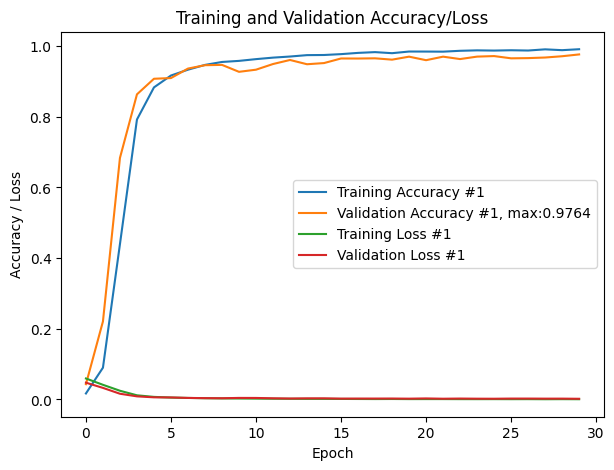

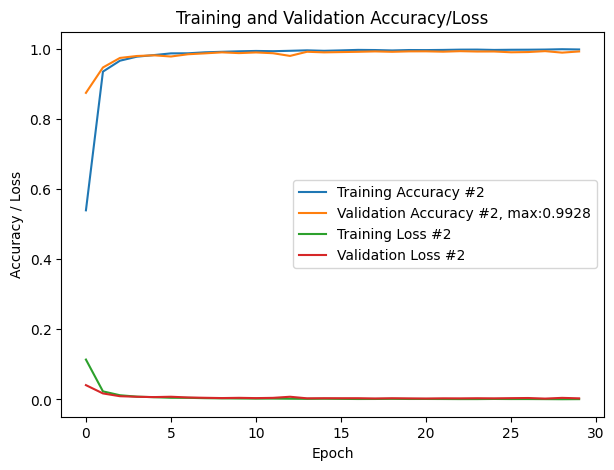

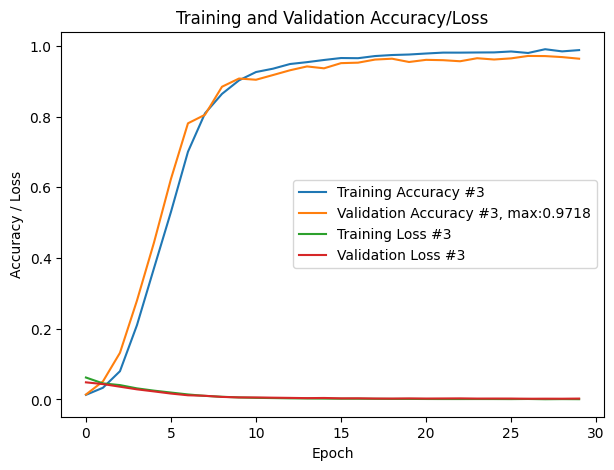

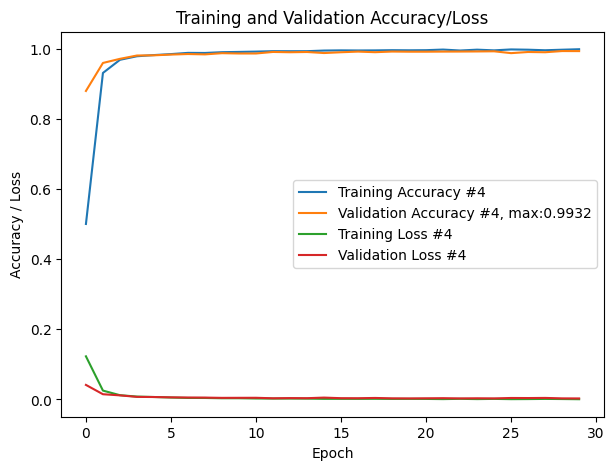

In [ ]:
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds1.pkl', 'rb') as file:
    loaded_history1 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds2.pkl', 'rb') as file:
    loaded_history2 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds3.pkl', 'rb') as file:
    loaded_history3 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+LSTM_32_relu_sigmoid_ds4.pkl', 'rb') as file:
    loaded_history4 = pickle.load(file)

dataset=1
plt.figure(figsize=(7, 5))
# You can access the metrics like accuracy and loss from the loaded_history dictionary
training_accuracy = loaded_history1['accuracy']
validation_accuracy = loaded_history1['val_accuracy']
training_loss = loaded_history1['loss']
validation_loss = loaded_history1['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
dataset=dataset+1
plt.figure(figsize=(7, 5))
training_accuracy = loaded_history2['accuracy']
validation_accuracy = loaded_history2['val_accuracy']
training_loss = loaded_history2['loss']
validation_loss = loaded_history2['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
dataset=dataset+1
plt.figure(figsize=(7, 5))
training_accuracy = loaded_history3['accuracy']
validation_accuracy = loaded_history3['val_accuracy']
training_loss = loaded_history3['loss']
validation_loss = loaded_history3['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
dataset=dataset+1
plt.figure(figsize=(7, 5))
training_accuracy = loaded_history4['accuracy']
validation_accuracy = loaded_history4['val_accuracy']
training_loss = loaded_history4['loss']
validation_loss = loaded_history4['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()

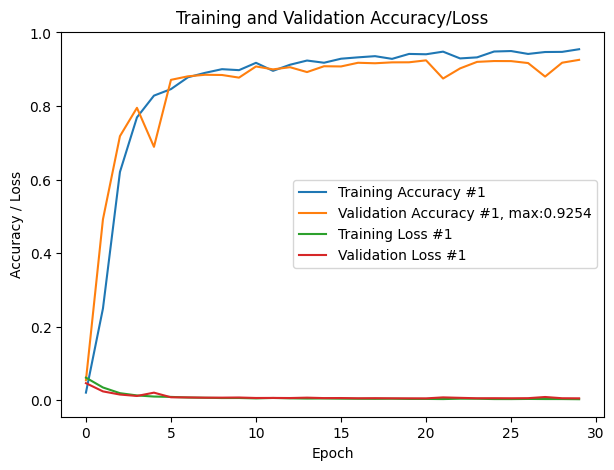

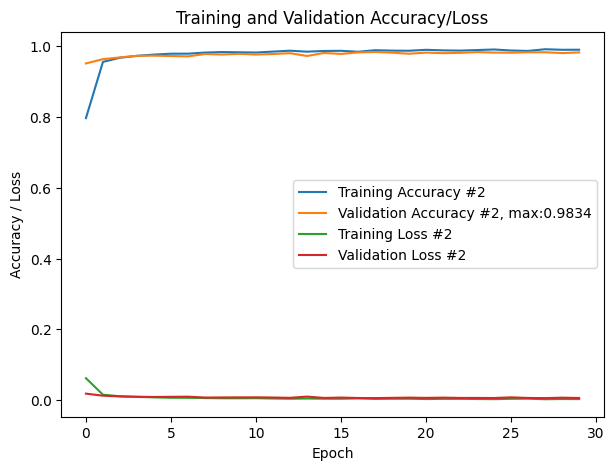

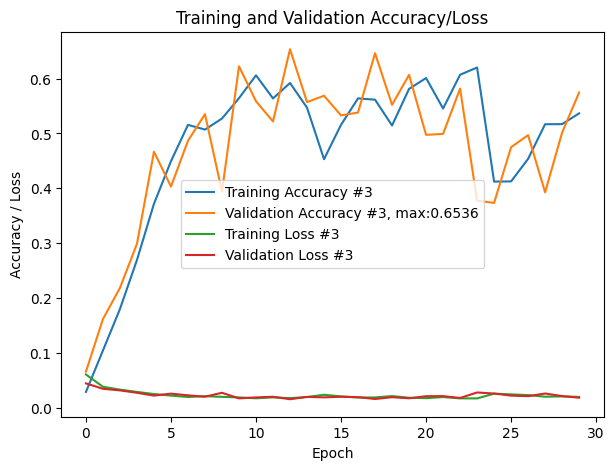

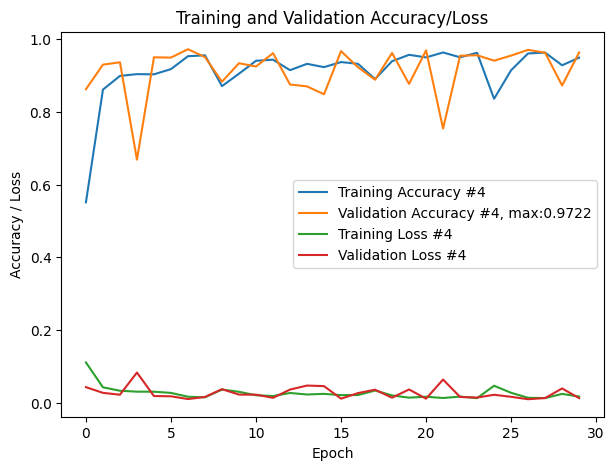

In [ ]:

# Load the saved model history
with open(data_path+'CNN+RNN_32_relu_sigmoid_ds1.pkl', 'rb') as file:
    loaded_history1 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+RNN_32_relu_sigmoid_ds2.pkl', 'rb') as file:
    loaded_history2 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+RNN_32_relu_sigmoid_ds3.pkl', 'rb') as file:
    loaded_history3 = pickle.load(file)
# Load the saved model history
with open(data_path+'CNN+RNN_32_relu_sigmoid_ds4.pkl', 'rb') as file:
    loaded_history4 = pickle.load(file)

dataset=1
plt.figure(figsize=(7, 5))
# You can access the metrics like accuracy and loss from the loaded_history dictionary
training_accuracy = loaded_history1['accuracy']
validation_accuracy = loaded_history1['val_accuracy']
training_loss = loaded_history1['loss']
validation_loss = loaded_history1['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
dataset=dataset+1
plt.figure(figsize=(7, 5))
training_accuracy = loaded_history2['accuracy']
validation_accuracy = loaded_history2['val_accuracy']
training_loss = loaded_history2['loss']
validation_loss = loaded_history2['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
dataset=dataset+1
plt.figure(figsize=(7, 5))
training_accuracy = loaded_history3['accuracy']
validation_accuracy = loaded_history3['val_accuracy']
training_loss = loaded_history3['loss']
validation_loss = loaded_history3['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()
dataset=dataset+1
plt.figure(figsize=(7, 5))
training_accuracy = loaded_history4['accuracy']
validation_accuracy = loaded_history4['val_accuracy']
training_loss = loaded_history4['loss']
validation_loss = loaded_history4['val_loss']
plt.plot(training_accuracy, label='Training Accuracy #'+str(dataset))
plt.plot(validation_accuracy, label=('Validation Accuracy #'+str(dataset)+', max:'+str(round(max(validation_accuracy),4))))
plt.plot(training_loss, label='Training Loss #'+str(dataset))
plt.plot(validation_loss, label='Validation Loss #'+str(dataset))
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy/Loss')
plt.show()